# Day 09. Exercise 00
# Regularization

## 0. Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import joblib

from sklearn.metrics import plot_confusion_matrix

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 1. Preprocessing

1. Read the file `dayofweek.csv` that you used in the previous day to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [2]:
df = pd.read_csv('../data/dayofweek.csv')
df.head()

,dayofweek,numTrials,hour,x0_user_0,x0_user_1,x0_user_10,x0_user_11,x0_user_12,x0_user_13,x0_user_14,...,x1_lab02,x1_lab03,x1_lab03s,x1_lab05s,x1_laba04,x1_laba04s,x1_laba05,x1_laba06,x1_laba06s,x1_project1
0,4,-0.788667,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,-0.756764,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,-0.724861,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,-0.692958,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,-0.661055,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=21,
                                                    stratify=df['dayofweek'])

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1348, 43), (338, 43), (1348,), (338,))

## 2. Logreg regularization

### a. Default regularization

1. Train a baseline model with the only parameters `random_state=21`, `fit_intercept=False`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model


The result of the code where you trained and evaluated the baseline model should be exactly like this (use `%%time` to get the info about how long it took to run the cell):

```
train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
```

In [5]:
def cross_valid(model, X, y, n, silent=None):
    
    cv = StratifiedKFold(n_splits=n)
    
    val_scores = []
    for train_index, test_index in cv.split(X, y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_test)
        
        train_score = accuracy_score(train_pred, y_train)
        val_score = accuracy_score(val_pred, y_test)
        val_scores.append(val_score)
        
        if not silent:
            print(f'train -  {train_score:.5f}   {"|"}   valid -  {val_score:.5f}')
    
    if not silent:
        print(f'Average accuracy on crossval is {np.mean(val_scores):.5f}')
        print(f'Std is {np.std(val_scores):.5f}')
    
    return np.mean(val_scores)

In [6]:
%%time
model = LogisticRegression(random_state=21, fit_intercept=False)

cross_valid(model, X_train, y_train, 10)

train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
CPU times: user 2.19 s, sys: 308 ms, total: 2.49 s
Wall time: 427 ms


0.6016473189607519

### b. Optimizing regularization parameters

1. In the cells below try different values of penalty: `none`, `l1`, `l2` – you can change the values of solver too.

In [7]:
for c in [0.01, 0.1, 0.5, 1, 2]:
    model = LogisticRegression(random_state=21, fit_intercept=False, C=c)
    val_score = cross_valid(model, X_train, y_train, 10, 'Shut up')
    print(f'C: {c:.2f} Average accuracy on crossval is {val_score:.5f}')

C: 0.01 Average accuracy on crossval is 0.42286
C: 0.10 Average accuracy on crossval is 0.52006
C: 0.50 Average accuracy on crossval is 0.59198
C: 1.00 Average accuracy on crossval is 0.60165
C: 2.00 Average accuracy on crossval is 0.61129


## 3. SVM regularization

### a. Default regularization

1. Train a baseline model with the only parameters `probability=True`, `kernel='linear'`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [8]:
svm = SVC(probability=True, kernel='linear', random_state=21)
cross_valid(svm, X_train, y_train, 10)

train -  0.70486   |   valid -  0.65926
train -  0.69662   |   valid -  0.75556
train -  0.69415   |   valid -  0.62222
train -  0.70239   |   valid -  0.65185
train -  0.69085   |   valid -  0.65185
train -  0.68920   |   valid -  0.64444
train -  0.69250   |   valid -  0.72593
train -  0.70074   |   valid -  0.62222
train -  0.69605   |   valid -  0.61940
train -  0.71087   |   valid -  0.63433
Average accuracy on crossval is 0.65871
Std is 0.04359


0.6587064676616916

### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `C`.

In [9]:
for c in [0.1, 1, 10]:
    svm = SVC(probability=True, kernel='linear', random_state=21, C=c)
    val_score = cross_valid(svm, X_train, y_train, 10, 'Shut up')
    print(f'C: {c:.2f} Average accuracy on crossval is {val_score:.5f}')

C: 0.10 Average accuracy on crossval is 0.56230
C: 1.00 Average accuracy on crossval is 0.65871
C: 10.00 Average accuracy on crossval is 0.72771


## 4. Tree

### a. Default regularization

1. Train a baseline model with the only parameter `max_depth=10` and `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [10]:
model = DecisionTreeClassifier(max_depth=10, random_state=21)
cross_valid(model, X_train, y_train, 10)

train -  0.81039   |   valid -  0.74074
train -  0.77741   |   valid -  0.74074
train -  0.83347   |   valid -  0.70370
train -  0.79720   |   valid -  0.76296
train -  0.82440   |   valid -  0.75556
train -  0.80379   |   valid -  0.68889
train -  0.80709   |   valid -  0.76296
train -  0.80132   |   valid -  0.65926
train -  0.80807   |   valid -  0.75373
train -  0.80478   |   valid -  0.68657
Average accuracy on crossval is 0.72551
Std is 0.03562


0.7255113322277501

### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `max_depth`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [11]:
for depth in range(1, 30):
    model = DecisionTreeClassifier(max_depth=depth, random_state=21, )
    val_score = cross_valid(model, X_train, y_train, 10, 'Shut up')
    print(f'Depth: {depth} Average accuracy on crossval is {val_score:.5f}')

Depth: 1 Average accuracy on crossval is 0.35532
Depth: 2 Average accuracy on crossval is 0.42949
Depth: 3 Average accuracy on crossval is 0.46140
Depth: 4 Average accuracy on crossval is 0.50889
Depth: 5 Average accuracy on crossval is 0.54301
Depth: 6 Average accuracy on crossval is 0.59570
Depth: 7 Average accuracy on crossval is 0.64989
Depth: 8 Average accuracy on crossval is 0.66098
Depth: 9 Average accuracy on crossval is 0.70325
Depth: 10 Average accuracy on crossval is 0.72551
Depth: 11 Average accuracy on crossval is 0.76999
Depth: 12 Average accuracy on crossval is 0.80413
Depth: 13 Average accuracy on crossval is 0.83009
Depth: 14 Average accuracy on crossval is 0.85235
Depth: 15 Average accuracy on crossval is 0.85459
Depth: 16 Average accuracy on crossval is 0.86571
Depth: 17 Average accuracy on crossval is 0.87388
Depth: 18 Average accuracy on crossval is 0.88055
Depth: 19 Average accuracy on crossval is 0.88054
Depth: 20 Average accuracy on crossval is 0.88649
Depth: 21

## 5. Random forest

### a. Default regularization

1. Train a baseline model with the only parameters `n_estimators=50`, `max_depth=14`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [12]:
model = RandomForestClassifier(n_estimators=50, max_depth=14, random_state=21)
cross_valid(model, X_train, y_train, 10)

train -  0.96455   |   valid -  0.88148
train -  0.96208   |   valid -  0.91852
train -  0.96785   |   valid -  0.86667
train -  0.96455   |   valid -  0.89630
train -  0.96538   |   valid -  0.91111
train -  0.96538   |   valid -  0.88148
train -  0.97115   |   valid -  0.91852
train -  0.96867   |   valid -  0.85185
train -  0.97364   |   valid -  0.88060
train -  0.97941   |   valid -  0.86567
Average accuracy on crossval is 0.88722
Std is 0.02204


0.8872194582642343

### b. Optimizing regularization parameters

1. In the new cells try different values of the parameters `max_depth` and `n_estimators`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [13]:
for n in [30, 50, 80]:
    for depth in [8, 16, 20, 22]:
        model = RandomForestClassifier(n_estimators=n,
                                       max_depth=depth,
                                       random_state=21)
        val_score = cross_valid(model, X_train, y_train, 10, 'Shut up')
        print(f'Depth: {depth}, n_estimators: {n} Avr accuracy {val_score:.5f}')

Depth: 8, n_estimators: 30 Avr accuracy 0.71960
Depth: 16, n_estimators: 30 Avr accuracy 0.88871
Depth: 20, n_estimators: 30 Avr accuracy 0.90652
Depth: 22, n_estimators: 30 Avr accuracy 0.91394
Depth: 8, n_estimators: 50 Avr accuracy 0.72105
Depth: 16, n_estimators: 50 Avr accuracy 0.89167
Depth: 20, n_estimators: 50 Avr accuracy 0.90874
Depth: 22, n_estimators: 50 Avr accuracy 0.91098
Depth: 8, n_estimators: 80 Avr accuracy 0.72031
Depth: 16, n_estimators: 80 Avr accuracy 0.89390
Depth: 20, n_estimators: 80 Avr accuracy 0.90948
Depth: 22, n_estimators: 80 Avr accuracy 0.91320


## 6. Predictions

1. Choose the best model and use it to make predictions for the test dataset.
2. Calculate the final accuracy.
3. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your test dataset).
4. Save the model.

In [14]:
model = RandomForestClassifier(n_estimators=80,
                               max_depth=22,
                               random_state=21)

model.fit(X_train, y_train)
pred_test = model.predict(X_test)

accuracy_score(pred_test, y_test)

0.9230769230769231

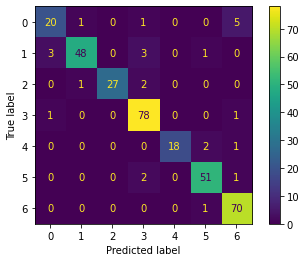

In [15]:
plot_confusion_matrix(model, X_test, y_test)

In [16]:
joblib.dump(model, '../data/model.joblib')

['../data/model.joblib']